In [316]:
import numpy as np
from cvxpy import *
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy.linalg as npl

# Question 1 d)

In [373]:
S = np.array([[5,-3],[-3,5]])
A = np.array([[1],[3]])

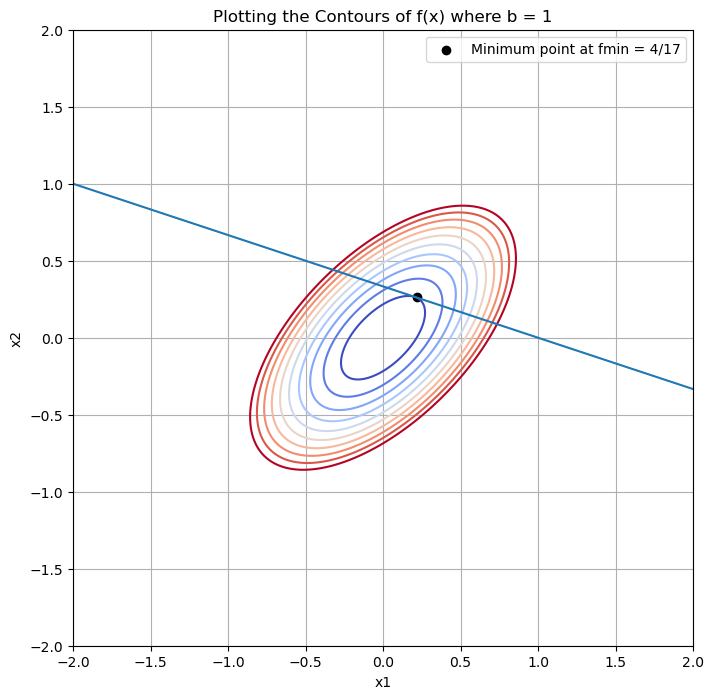

In [475]:
b = 1
### This works for arbitrary b
X1 = (7/32)*b
X2 = (9/34)*b
lamda = (4/17)*b
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x1, x2 = np.meshgrid(x, y)

levels = np.array([2*b**2/17,2*(2*b**2/17),3*(2*b**2/17),4*(2*b**2/17),5*(2*b**2/17),6*(2*b**2/17),7*(2*b**2/17),8*(2*b**2/17),9*(2*b**2/17),10*(2*b**2/17)])
#levelmin = 4/17
Z = 0.5 * ( 5 * x1**2 - 6 * x1 * x2 + 5 * x2**2)
ax.contour(x1, x2, Z, levels = levels,cmap="coolwarm")

## we have the constraint x1+3*x2 -b = 0
m = -1/3
c = b/3
plt.plot(x,m*x+c)
plt.grid()
plt.scatter(X1,X2,color = 'black',label = 'Minimum point at fmin = 4/17')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plotting the Contours of f(x) where b = %.0f'%b)
plt.legend()

# Question 2 d) Calculations

In [378]:
x0 = np.array([[3],[5]])
r0 = -S@x0
alpha = npl.norm(r0)**2/(r0.T@S@r0)
x1 = x0-alpha*(S@x0)
print(f"x1 = {x1}")

x1 = [[3. ]
 [1.8]]


In [380]:
r1 = -S@x1
alpha = npl.norm(r1)**2/(r1.T@S@r1)
x2 = x1-alpha*(S@x1)
print(f"x2 = {x2}")

x2 = [[1.08]
 [1.8 ]]


In [382]:
r2 = -S@x2
alpha = npl.norm(r2)**2/(r2.T@S@r2)
x3 = x2-alpha*(S@x2)
print(f"x3 = {x3}")

x3 = [[1.08 ]
 [0.648]]


In [384]:
r3 = -S@x3
alpha = npl.norm(r3)**2/(r3.T@S@r3)
x4 = x3-alpha*(S@x3)
print(f"x4 = {x4}")

x4 = [[0.3888]
 [0.648 ]]


In [386]:
r4 = -S@x4
alpha = npl.norm(r4)**2/(r4.T@S@r4)
x5 = x4-alpha*(S@x4)
print(f"x5 = {x5}")

x5 = [[0.3888 ]
 [0.23328]]


In [388]:
r5 = -S@x5
alpha = npl.norm(r5)**2/(r5.T@S@r5)
x6 = x5-alpha*(S@x5)
print(f"x6 = {x6}")

x6 = [[0.139968]
 [0.23328 ]]


# Question 2 e) Graph

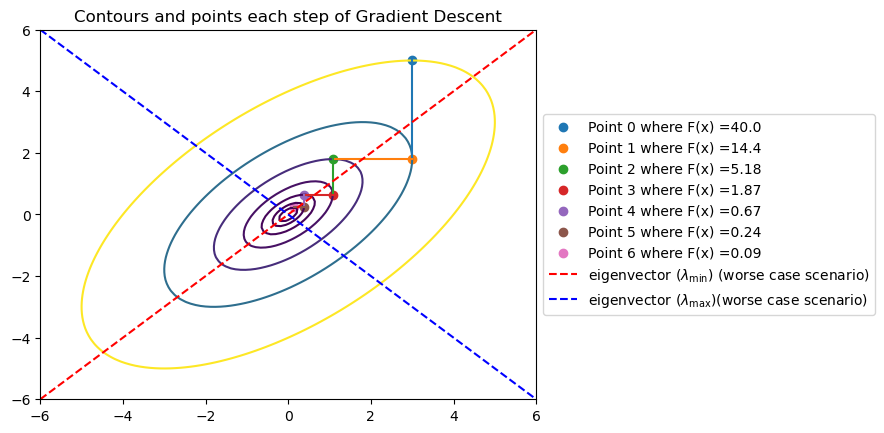

In [465]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x, y)
Z = 0.5 * (5 * X1**2 - 6 * X1 * X2 + 5 * X2**2)

## Looping gradient descent so that I can get array of xvals and function values
N = 6
initialguess = np.array([3, 5])
xvals = [initialguess]
funcvals = [0.5 * initialguess.T @ S @ initialguess]

for i in range(1, N+1):
    x = xvals[-1]
    alpha = npl.norm(S @ x)**2 / ((S @ x).T @ S @ (S @ x))
    xk = x - alpha * (S @ x)
    xvals.append(xk)
    funcvals.append((0.5 * xk.T @ S @ xk))
    #print(f"X{i} after iteration {i} is x1 = {round(xk[0], 4)}, x2 = {round(xk[1], 4)}")

xvals = np.array(xvals)

plt.contour(X1, X2, Z, levels=sorted(funcvals))


for i in range(0, len(xvals)):
    x = xvals[i,0]     # x-coordinate
    y = xvals[i,1] # y-coordinate
    plt.scatter(x, y, label=f'Point {i} where F(x) ={round(funcvals[i],2)}')

for i in range(0,len(xvals)-1):
    x1 = xvals[i,0]
    x2 = xvals[i+1,0]
    y1 = xvals[i,1]
    y2 = xvals[i+1,1]
    plt.plot([x1,x2],[y1,y2])



x = np.linspace(-6, 6, 100)
eig2 = npl.eig(S)[1][:,1]
m = eig2[0]/eig2[1]
plt.plot(x,m*x,'r--',label = 'eigenvector ($\\lambda_{\\text{min}}$) (worse case scenario)')
eig1 = npl.eig(S)[1][:,0]
m = eig1[0]/eig1[1]
plt.plot(x,m*x,'b--',label = 'eigenvector ($\\lambda_{\\text{max}}$)(worse case scenario)' )
plt.title('Contours and points each step of Gradient Descent')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Outside right
plt.show()

## We plot the eigenvectors as this is the line of worst case scenario. Any point on these lines will result in the worst case scenario

# Q3 b

In [395]:
lamdas,eigvects = npl.eig(S)
maxlam = lamdas[0]
minlam = lamdas[1]
print(f"maximum eigenvalue of S = {maxlam}, minimum eigenvalue of S = {round(minlam,3)} ")

maximum eigenvalue of S = 8.0, minimum eigenvalue of S = 2.0 


In [397]:
alpha = (2/(np.sqrt(maxlam)+np.sqrt(minlam)))**2
beta = ((np.sqrt(8)-np.sqrt(2))/(np.sqrt(8)+np.sqrt(2)))**2
print(f"alpha = {round(alpha,4)} , beta = {round(beta,4)}")

alpha = 0.2222 , beta = 0.1111


In [399]:
x0 = np.array([[3],[5]])
z0 = S@x0  ## for first step z0 = grad(f(x0))
x1 = x0 - alpha*z0 
z1 = S@x1+beta*z0
print(f"x1 = {x1}")

x1 = [[3.        ]
 [1.44444444]]


In [401]:
x2 = x1 - alpha*z1
z2 = S@x2+beta*z1
x2

array([[0.62962963],
       [1.44444444]])

In [403]:
x3 = x2 - alpha*z2
z3 = S@x3+beta*z2
x3

array([[0.62962963],
       [0.25925926]])

In [405]:
x4 = x3 - alpha*z3
z4 = S@x4+beta*z3
x4

array([[0.10288066],
       [0.25925926]])

In [407]:
x5 = x4 - alpha*z4
z5 = S@x5+beta*z4
x5

array([[0.10288066],
       [0.03978052]])

In [409]:
x6 = x5 - alpha*z5
z6 = S@x6+beta*z5
x6

array([[0.01508916],
       [0.03978052]])

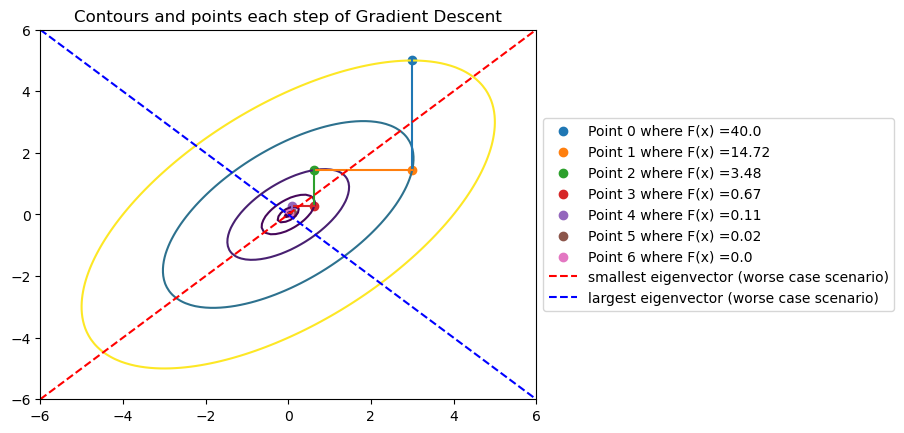

In [417]:
N = 6
S = np.array([[5,-3],[-3,5]])
x = np.array([3,5])
z = S@x ## for first step z0 = grad(f(x0))
xmomvals = [x]
funcmomvals = [0.5*x@S@x]
for i in range(N):
    x = x - alpha*z
    z = S@x+beta*z
    xmomvals.append(x)
    funcmomvals.append(0.5*x@S@x)
xmomvals = np.array(xmomvals)

plt.contour(X1, X2, Z, levels=sorted(funcmomvals))

for i in range(0, len(xmomvals)):
    x = xmomvals[i,0]     # x-coordinate
    y = xmomvals[i,1] # y-coordinate
    plt.scatter(x, y, label=f'Point {i} where F(x) ={round(funcmomvals[i],2)}')

for i in range(0,len(xvals)-1):
    x1 = xmomvals[i,0]
    x2 = xmomvals[i+1,0]
    y1 = xmomvals[i,1]
    y2 = xmomvals[i+1,1]
    plt.plot([x1,x2],[y1,y2])

x = np.linspace(-6, 6, 100)
eig2 = npl.eig(S)[1][:,1]
m = eig2[0]/eig2[1]
plt.plot(x,m*x,'r--',label = 'smallest eigenvector (worse case scenario)')
eig1 = npl.eig(S)[1][:,0]
m = eig1[0]/eig1[1]
plt.plot(x,m*x,'b--',label = 'largest eigenvector (worse case scenario)' )
plt.title('Contours and points each step of Gradient Descent')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Outside right
plt.show()

# Q 3d Comparing both methods

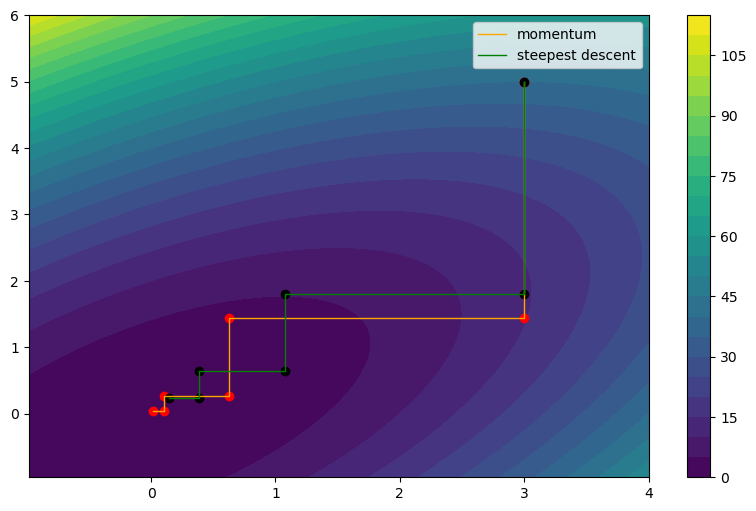

In [436]:
xx = np.linspace(np.min(xmomvals[:,0])-1,np.max(xmomvals[:,0])+1,500)
yy = np.linspace(np.min(xmomvals[:,1])-1,np.max(xmomvals[:,1])+1,500)
Xgrid,Ygrid = np.meshgrid(xx,yy)

Z = np.zeros(Xgrid.shape)

for i in range(Xgrid.shape[0]):
    for j in range (Xgrid.shape[1]):
        v = np.array([Xgrid[i,j],Ygrid[i,j]])
        Z[i,j] = 0.5*v@S@v


fig = plt.figure(figsize=(10,6))

plt.contourf(Xgrid, Ygrid, Z, levels=25)
plt.colorbar()
plt.plot(xmomvals[:,0], xmomvals[:,1], lw = 1, c = "orange",label = 'momentum')
plt.scatter(xmomvals[:,0],xmomvals[:,1],color = 'red')
plt.plot(xvals[:,0], xvals[:,1], lw = 1, c = "green",label = 'steepest descent')
plt.scatter(xvals[:,0],xvals[:,1],color = 'black')
plt.legend()

plt.show()